In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from simul_ising import Metropolis  #  On importe la classe.
from tqdm import tqdm # Pour afficher où on est rendu dans la série de simulations.

data_folder = "data/" # Ne pas oublier le "/" après. Si en windows, c'est "\"

## Analyse des séries de simulation, enregistrées en format HDF5 
## (Cht'un grand fan, laissez-moi le temps de setupper le pipeline d'analyse comme du monde.)

### S'inspirer du simulateur Kuramoto.

1) Faire un dossier pour chaque série de simulations, quelle qu'elle soit. 
2) Enregistrer les multiples simuls pour aller chercher la variabilité de type (incertitude de type A) dans un même hdf5. 
3) Nouveau hdf5 pour nouvelle valeur de champ $h$ ou de tout autre paramètre, par exemple le pourcentage de spin up à l'état initial.
4) Faire un dossier différent pour chaque valeur de température ($\beta J$) essayée -> Permettra de calculer l'aire de la boucle d'hystérésis selon $\beta J$. 

In [ ]:
sim_id = len(fc.identify_files(top_dir+"/Data/sims", keywords=["kuramoto"]))
sim_folder = top_dir + "/Data/sims/" + "kuramoto_sim_{}".format(sim_id)
fc.create_folder(sim_folder)

In [ ]:
for j in omega_sweep_n:
    # Enregistrement des données sous forme de dictionnaire
    sim_iteration = len(fc.identify_files(sim_folder, keywords=["kuramoto"]))
    if omega_unif or omega_ponctual or omega_static:
        fc.save_hdf5(sim_folder +"/{}_".format(fc.fill_index(sim_iteration)) + "kuramoto_wR={}.hdf5".format(str(sims_dict["omega_r"]).replace(".", "_")), sims_dict)
        clear_output(wait=True)
        print("Enregistrement pour wR={}".format(str(sims_dict["omega_r"]).replace(".", "_")) )
    elif omega_normal:
        fc.save_hdf5(sim_folder +"/{}_".format(fc.fill_index(sim_iteration)) + "kuramoto_wStd={}.hdf5".format(str(sims_dict["omega_std"]).replace(".", "_")), sims_dict)
        clear_output(wait=True)
        print("Enregistrement pour wStd={}".format(str(sims_dict["omega_std"]).replace(".", "_")) )


Clefs du fichier : ['run_0000', 'run_0001', 'run_0002', 'run_0003', 'run_0004', 'run_0005', 'run_0006', 'run_0007', 'run_0008', 'run_0009', 'run_0010', 'run_0011', 'run_0012', 'run_0013', 'run_0014', 'run_0015', 'run_0016', 'run_0017', 'run_0018', 'run_0019', 'run_0020', 'run_0021', 'run_0022', 'run_0023', 'run_0024', 'run_0025', 'run_0026', 'run_0027', 'run_0028', 'run_0029', 'run_0030', 'run_0031', 'run_0032', 'run_0033', 'run_0034', 'run_0035', 'run_0036', 'run_0037', 'run_0038', 'run_0039', 'run_0040', 'run_0041', 'run_0042', 'run_0043', 'run_0044', 'run_0045', 'run_0046', 'run_0047', 'run_0048', 'run_0049', 'run_0050', 'run_0051', 'run_0052', 'run_0053', 'run_0054', 'run_0055', 'run_0056', 'run_0057', 'run_0058', 'run_0059', 'run_0060', 'run_0061', 'run_0062', 'run_0063', 'run_0064', 'run_0065', 'run_0066', 'run_0067', 'run_0068', 'run_0069', 'run_0070', 'run_0071', 'run_0072', 'run_0073', 'run_0074', 'run_0075', 'run_0076', 'run_0077', 'run_0078', 'run_0079', 'run_0080', 'run_008

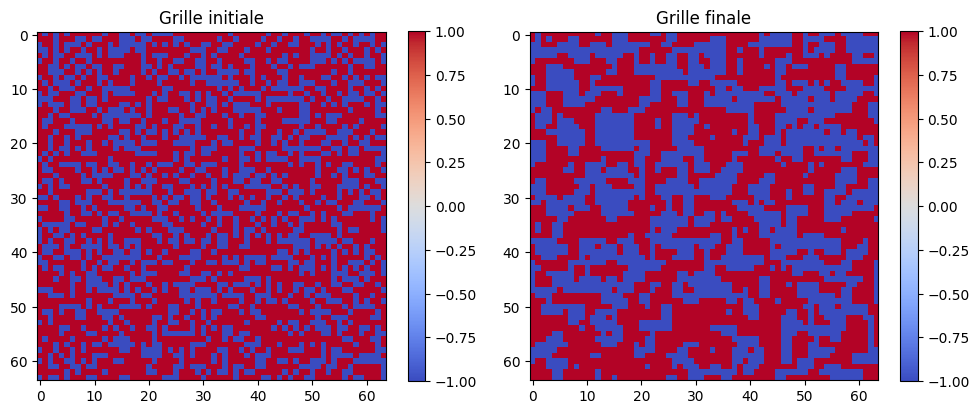

Énergie : [  -96.8   -96.8   -97.6 ... -7406.4 -7406.4 -7406.4]
Magnétisation : [0.18994141 0.18994141 0.18945312 ... 0.05957031 0.05957031 0.05957031]


In [14]:
dataset_name = "run_0001"  # Remplacez par le nom du groupe que vous voulez lire

data= {}

with h5py.File(data_folder + "results.h5", "r") as file:
    print("Clefs du fichier :", list(file.keys()))
    
    if dataset_name in file:
        group = file[dataset_name]
        data= group
        print(f"Attributs du groupe {dataset_name}:", dict(group.attrs))
        initial_lattice = group["initial_lattice"][:]
        final_lattice = group["final_lattice"][:]
        energy = group["energy"][:]
        magnetization = group["magnetization"][:]
        
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.title("Grille initiale")
        plt.imshow(initial_lattice, cmap="coolwarm", interpolation="nearest")
        plt.colorbar()
        plt.subplot(1, 2, 2)
        plt.title("Grille finale")
        plt.imshow(final_lattice, cmap="coolwarm", interpolation="nearest")
        plt.colorbar()
        plt.tight_layout()
        plt.show()
        print("Énergie :", energy)
        print("Magnétisation :", magnetization)
    else:
        print(f"Le groupe {dataset_name} n'existe pas dans le fichier.")